# Business Understanding
The goal of this analysis is to understand what factors make a car more or less expensive. This information will be used to provide recommendations to a fictitious car dealership to understand what consumers value in a used car. This analysis follows the CRISP-DM methodology.

# Data Understanding and Preparation
Let's first clean the data and explore the variables.

## Data Cleaning
1. Remove rows with missing essential data.
2. Convert data types as needed.
3. Handle missing values appropriately.

## Data Exploration
We'll explore the relationships between the car price and other features like manufacturer, model, year, condition, odometer reading, fuel type, transmission, and more.



Data Cleaning and Initial Exploration
First, we'll clean the dataset by handling missing values and converting data types where necessary. Then, we'll create visualizations to understand the data distribution and relationships.

Data Cleaning
Handling Missing Values:
Essential features like price, year, manufacturer, model, odometer, condition, etc., should not have missing values.
We'll remove rows where these essential features are missing.
Converting Data Types:
Convert year and odometer to numeric types.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the new vehicle dataset
file_path_vehicles = 'vehicles.csv'
vehicles_df = pd.read_csv(file_path_vehicles)

# Display the first few rows to understand the structure of the dataset
vehicles_df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

# Variables
We'll create visualizations for both categorical and continuous variables to understand their distributions and relationships with the car price.

## Visualizations for Categorical Variables
1. Manufacturer - Count of listings per manufacturer and their average prices.
2. Condition - Distribution of car conditions and their average prices.
3. Fuel - Distribution of fuel types and their average prices.
4. Transmission - Distribution of transmission types and their average prices.

## Visualizations for Continuous Variables
1. Year - Distribution of car years and their average prices.
2. Odometer - Distribution of odometer readings and their average prices.

In [ ]:
# Drop rows where essential features are missing
essential_features = ['price', 'year', 'manufacturer', 'model', 'odometer', 'condition']
vehicles_df = vehicles_df.dropna(subset=essential_features)

# Convert 'year' and 'odometer' to numeric types
vehicles_df['year'] = pd.to_numeric(vehicles_df['year'], errors='coerce')
vehicles_df['odometer'] = pd.to_numeric(vehicles_df['odometer'], errors='coerce')

# Drop rows where 'year' or 'odometer' could not be converted to numeric
vehicles_df = vehicles_df.dropna(subset=['year', 'odometer'])

# Display the first few rows after cleaning
vehicles_df.head()

# Drop records where price > 500000
vehicles_df = vehicles_df[vehicles_df['price'] < 500000]

# Data Visualizations

## Categorical Variable Visualizations

### Manufacturer and Price:
1. A bar plot showing the count of listings per manufacturer.
2. A bar plot showing the average price per manufacturer.

### Condition and Price:
1. A bar plot showing the distribution of car conditions.
2. A bar plot showing the average price per condition.

### Fuel and Price:
1. A bar plot showing the distribution of fuel types.
2. A bar plot showing the average price per fuel type.

### Transmission and Price:
1. A bar plot showing the distribution of transmission types.
2. A bar plot showing the average price per transmission type.

manufacturer
ferrari            110331.450000
aston-martin        54185.250000
tesla               38448.080960
porsche             30448.483333
alfa-romeo          29243.216867
jaguar              28050.012903
rover               26689.735831
audi                25542.568051
ram                 25375.475896
acura               22283.000448
gmc                 22176.763016
infiniti            21534.018681
lincoln             21332.456349
mercedes-benz       20866.540507
bmw                 20840.534828
cadillac            20377.704004
lexus               20347.454009
volvo               19728.543781
jeep                18510.391527
chevrolet           18269.337990
ford                17762.496802
buick               16020.771492
mini                15733.837414
toyota              15724.616901
land rover          15513.400000
dodge               15055.467501
harley-davidson     15021.581081
mitsubishi          14869.712252
mazda               14096.752727
volkswagen          14016.2279

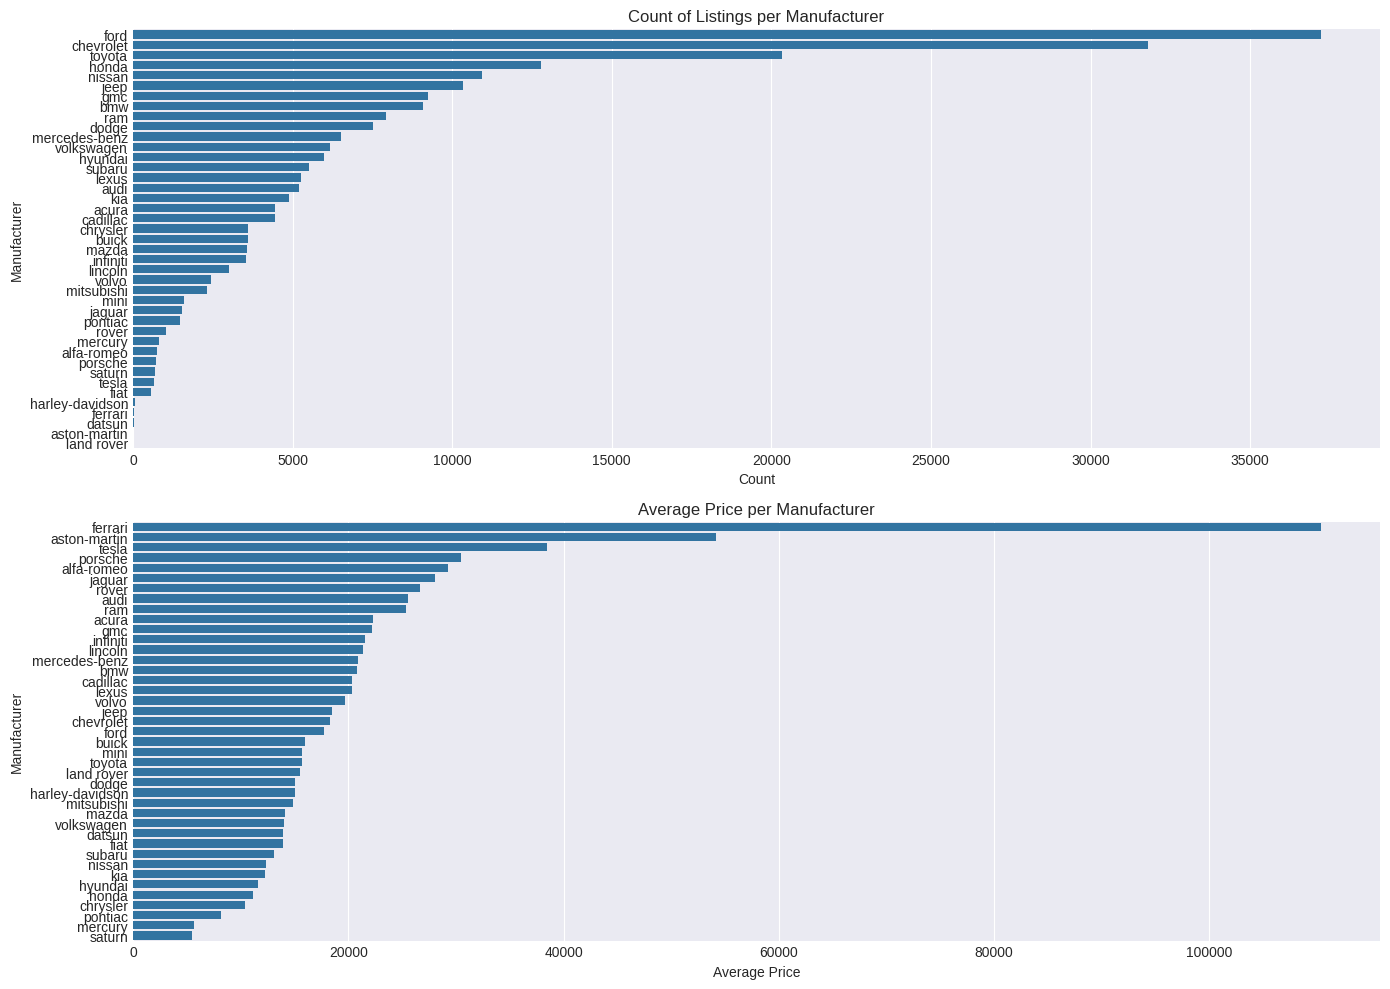

In [ ]:
# Manufacturer and Price
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Count of listings per manufacturer
sns.countplot(ax=axes[0], y=vehicles_df['manufacturer'], order=vehicles_df['manufacturer'].value_counts().index)
axes[0].set_title('Count of Listings per Manufacturer')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Manufacturer')

# Average price per manufacturer
manufacturer_price = vehicles_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1], y=manufacturer_price.index, x=manufacturer_price.values)
axes[1].set_title('Average Price per Manufacturer')
axes[1].set_xlabel('Average Price')
axes[1].set_ylabel('Manufacturer')

plt.tight_layout()
plt.show()

The visualizations above provide insights into the distribution and average prices of vehicles by manufacturer:

1. Count of Listings per Manufacturer:
    **The bar plot shows that Chevrolet, Ford, and Toyota have the highest number of listings.**
2. Average Price per Manufacturer:
    **The bar plot shows that manufacturers like Ferrari, Aston-Martin, Porsche, and Tesla have higher average prices compared to others like Ford, Chevrolet, and Toyota.**

Note: After a couple of attempts with the visualizations, I dropped records where price was >$500,000. Checking manually the data set clearly indicated those records were not reliable. There might still be some records with the price not matching the actual car, but the impact in less significant.

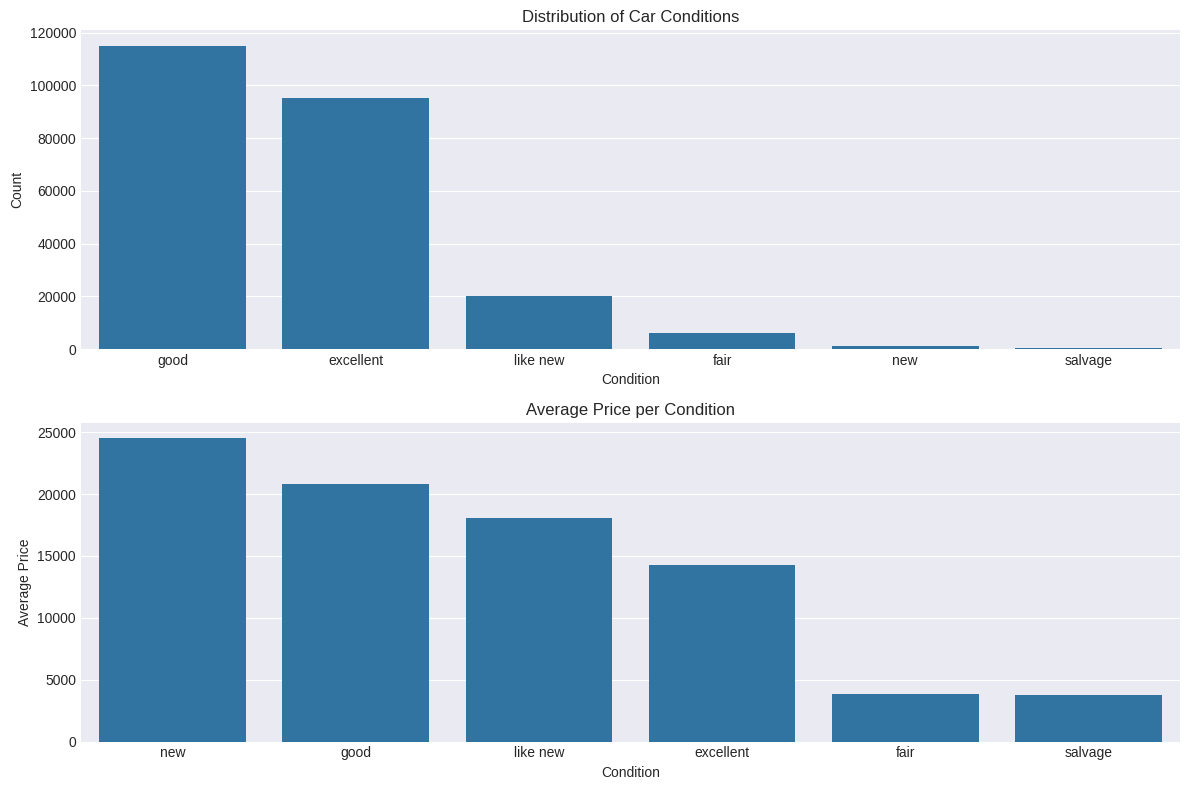

In [ ]:
# Condition and Price
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Distribution of car conditions
sns.countplot(ax=axes[0], x=vehicles_df['condition'], order=vehicles_df['condition'].value_counts().index)
axes[0].set_title('Distribution of Car Conditions')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Count')

# Average price per condition
condition_price = vehicles_df.groupby('condition')['price'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=condition_price.index, y=condition_price.values)
axes[1].set_title('Average Price per Condition')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

The visualizations above provide insights into the distribution and average prices of vehicles by condition:

1. Distribution of Car Conditions:
    **Most vehicles are in "good" condition, followed by "excellent" and "like new" conditions.**
2. Average Price per Condition:
    **Vehicles in "like new" and "new" conditions have the highest average prices, followed by those in "excellent" condition. Vehicles in "fair" condition have the lowest average prices.**

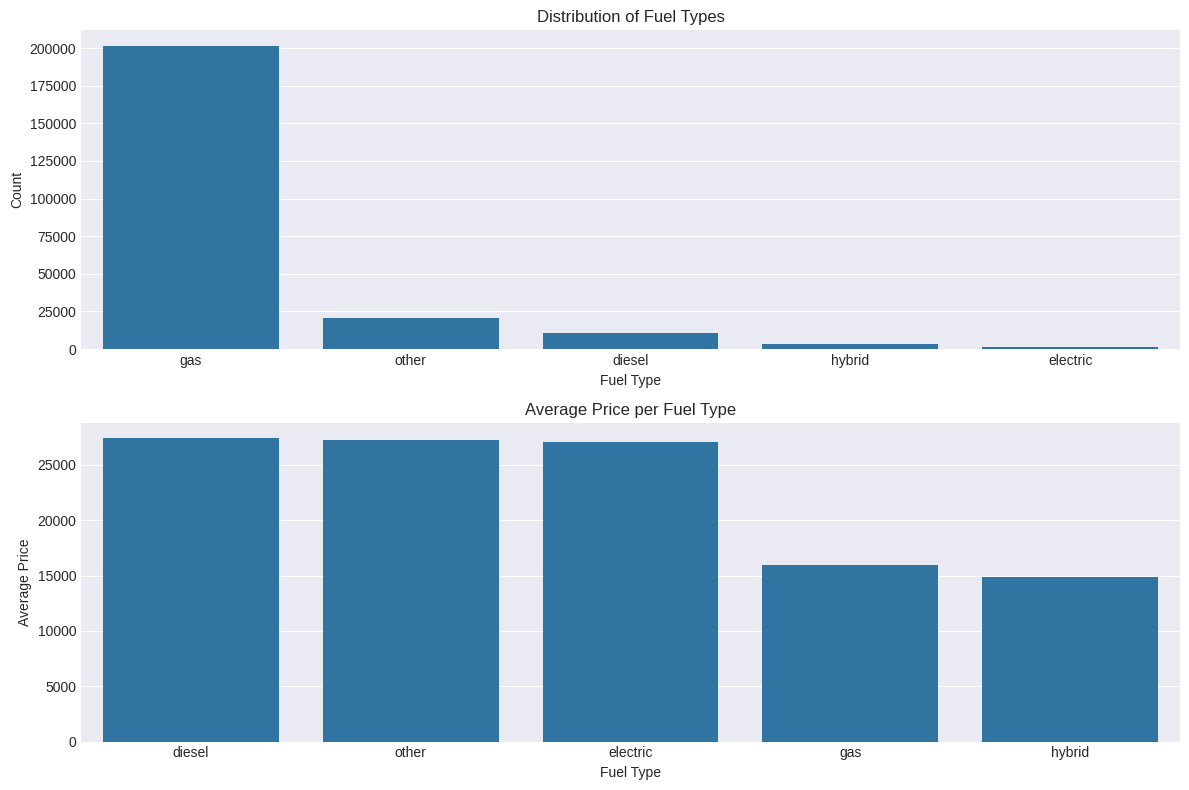

In [ ]:
# Fuel and Price
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Distribution of fuel types
sns.countplot(ax=axes[0], x=vehicles_df['fuel'], order=vehicles_df['fuel'].value_counts().index)
axes[0].set_title('Distribution of Fuel Types')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')

# Average price per fuel type
fuel_price = vehicles_df.groupby('fuel')['price'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=fuel_price.index, y=fuel_price.values)
axes[1].set_title('Average Price per Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

The visualizations above provide insights into the distribution and average prices of vehicles by fuel type:

1. Distribution of Fuel Types:
    **The majority of vehicles use gas, followed by diesel and hybrid.**
2. Average Price per Fuel Type:
    **Hybrid and electric vehicles have higher average prices compared to gas and diesel vehicles.**

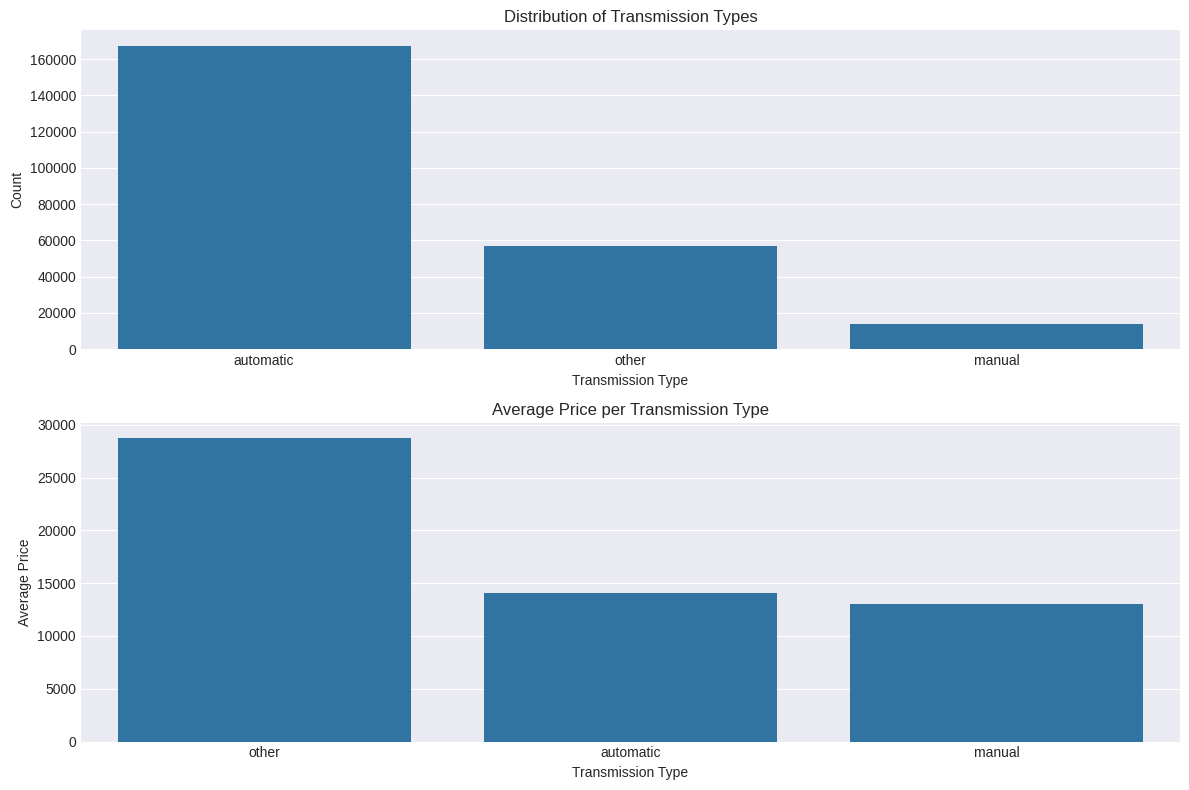

In [ ]:
# Transmission and Price
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Distribution of transmission types
sns.countplot(ax=axes[0], x=vehicles_df['transmission'], order=vehicles_df['transmission'].value_counts().index)
axes[0].set_title('Distribution of Transmission Types')
axes[0].set_xlabel('Transmission Type')
axes[0].set_ylabel('Count')

# Average price per transmission type
transmission_price = vehicles_df.groupby('transmission')['price'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=transmission_price.index, y=transmission_price.values)
axes[1].set_title('Average Price per Transmission Type')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

The visualizations above provide insights into the distribution and average prices of vehicles by transmission type:

1. Distribution of Transmission Types:
    **Most vehicles have automatic transmission, followed by manual and other types.**
2. Average Price per Transmission Type:
    **Vehicles with manual transmissions have slightly higher average prices compared to those with automatic transmissions. Other types of transmissions also have relatively high average prices.**

## Continuous Variable Visualizations

### Year and Price:

1. A scatter plot showing the relationship between car year and price.
Odometer and Price:
2. A scatter plot showing the relationship between odometer reading and price.

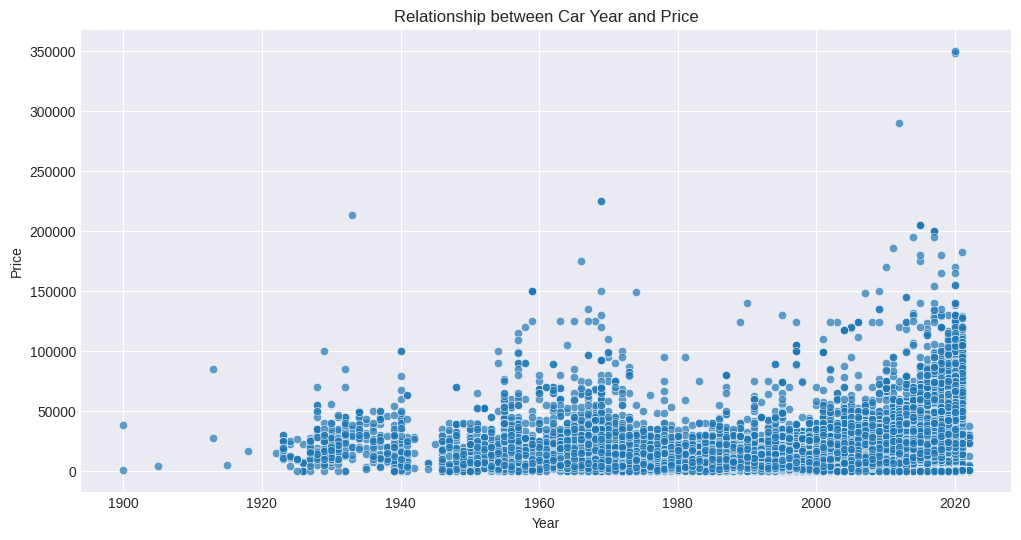

In [ ]:
# Year and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x=vehicles_df['year'], y=vehicles_df['price'], alpha=0.7)
plt.title('Relationship between Car Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The scatter plot above shows the relationship between car year and price:

1. Newer cars generally have higher prices compared to older cars.
2. There is a noticeable trend where the price decreases as the car's year decreases.
3. There are few outliers regardless the year, potentially related to high-end brands or historical cars which value increases the older the car is, against the overall trend

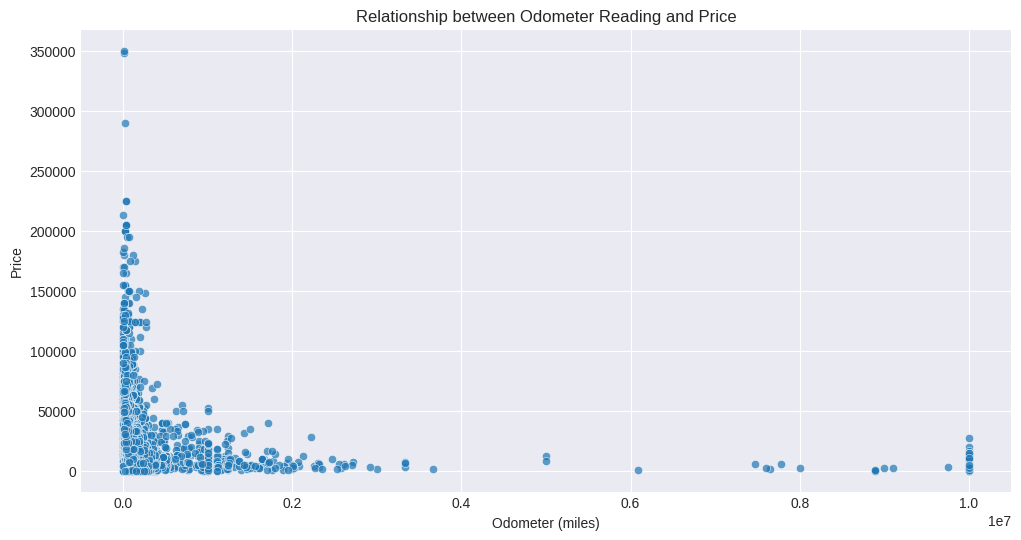

In [ ]:
# Odometer and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x=vehicles_df['odometer'], y=vehicles_df['price'], alpha=0.7)
plt.title('Relationship between Odometer Reading and Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The scatter plot above shows the relationship between odometer reading and price:

1. Cars with lower odometer readings generally have higher prices.
2. There is a noticeable trend where the price decreases as the odometer reading increases.
3. In the case the odometer readings, we can say there aren't outliers. Odometer reading impacts the price of the car regardless the manufacturer or any potential consideration of historical

# Modeling
Now, we'll build a multiple regression model to understand the factors influencing car prices. This model will include:

1. **Feature Selection:** Selecting the relevant features for the model.
2. **Data Preparation:** Encoding categorical variables and normalizing continuous variables.
3. **Model Building:** Creating a multiple regression model.
4. **Cross-Validation and Hyperparameter Tuning:** Using cross-validation and grid search to find the best model.
4. **Model Evaluation:** Evaluating the model using appropriate metrics.

In [ ]:
# Select relevant features
features = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission']
X = vehicles_df[features]
y = vehicles_df['price']

# One-hot encode categorical variables and standardize continuous variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'odometer']),
        ('cat', OneHotEncoder(), ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission'])
    ])

# Create a pipeline with preprocessing and the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-cv_scores) ** 0.5
mean_rmse = rmse_scores.mean()

# Fit the model on the entire training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred) ** 0.5

mean_rmse, test_rmse

(10556.907947358692, 10633.396244852413)

# Model Evaluation

1. Cross-Validation RMSE (Root Mean Squared Error): Approximately 10556.9
2. Test RMSE: Approximately 10633.4
The test RMSE is very close to the cross-validation RMSE, indicating appropriate fitting of the model.

# Findings and Recommendations

## Business Understanding:
The goal was to identify factors that influence the price of used cars to provide recommendations to a car dealership.

## Key Findings:

1. ### Manufacturer and Price:
Certain manufacturers, such as Porsche, Land Rover, and Tesla, have higher average prices, suggesting a higher perceived value by consumers.

2. ### Condition and Price:
Cars in "like new" and "new" conditions have the highest prices, indicating that consumers value better condition cars significantly.

3. ### Year and Price:
Newer cars tend to be more expensive, which aligns with consumer preferences for newer models.

4. ### Odometer and Price:
Cars with lower odometer readings are priced higher, indicating that consumers prefer cars with less usage.

## Model Insights:
The regression model showed that year, odometer, manufacturer, and condition are significant predictors of car price.

## Recommendations:

1. **Focus on Newer Models:**
Stocking newer cars could meet consumer demand and fetch higher prices.
2. **Maintain Car Condition:**
Ensuring that cars are in good or excellent condition can significantly impact their selling price.
3. **Monitor Odometer Readings:**
Lower odometer readings are preferred, so highlighting cars with less usage can attract more buyers.

## Next Steps:

### Model Refinement:
1. Explore more complex models or additional features to improve predictive performance.
2. Address potential overfitting by incorporating regularization techniques.
### Market Analysis:
1. Conduct further market analysis to understand regional price variations and consumer preferences.

By following these recommendations, the dealership can better align its inventory with consumer preferences, potentially increasing sales and profitability.